<a href="https://colab.research.google.com/github/Khaled-Mohammed-Abdelgaber/ml-projects-for-training/blob/main/kaggle_competition_version2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sequence of my code is as follow:

## A) Reading Data

## B) Preprocessing:

   #### 1) Check correlation between features and output
   #### 2) Choosing the top correlated features
   #### 3) Handling missing data
   #### 4) Outliers
   #### 5) Data normalization
  
## C) Choosing regression technique

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

%matplotlib  inline

# reading data

In [2]:
houses_data = pd.read_csv("/content/train.csv")
houses_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
houses_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [88]:
#houses_data = pd.get_dummies(houses_data)

# Correlation check and choosing the most correlated features


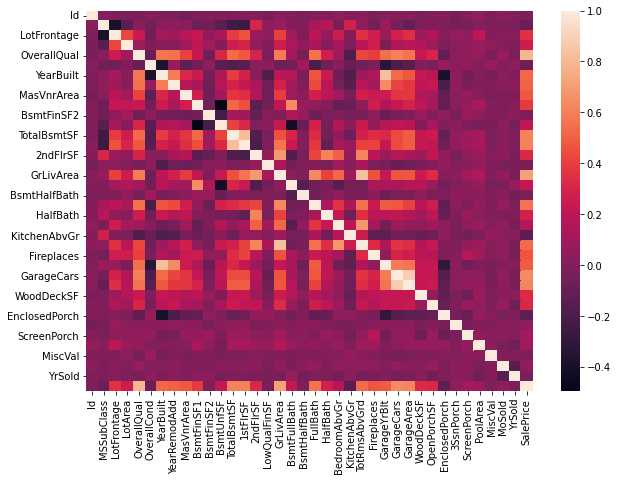

In [4]:
corr = houses_data.corr()
f, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(corr)

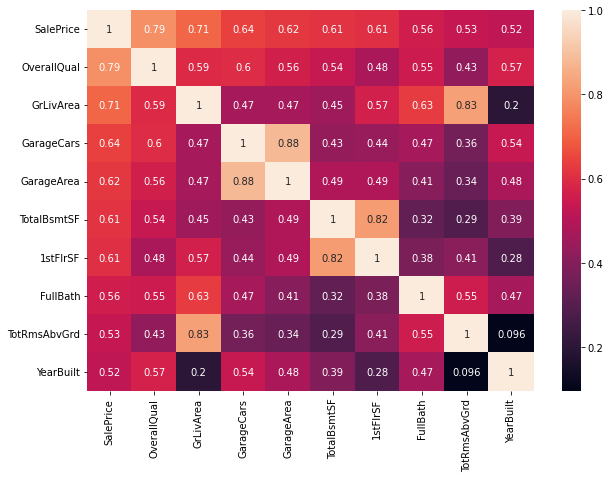

In [5]:
"""Correlation coefficient values below 0.3 are considered to be weak; 0.3-0.7 are moderate; >0.7 are strong"""
#cols of features that most correlated to SalePrice
cols = corr.nlargest(10,"SalePrice")["SalePrice"].index
#additional step
f, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(houses_data[cols].corr(),annot = True)

# Missing Data

In [6]:
houses_data = houses_data.drop(["Id"],axis = 1) #drop id since it just counter
isnull_df = pd.DataFrame(houses_data.isna().sum().sort_values(ascending = False),columns = ["null_sum"])
isnull_df.head(20)

,null_sum
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
FireplaceQu,690
LotFrontage,259
GarageYrBlt,81
GarageCond,81
GarageType,81
GarageFinish,81


In [7]:
#I will drop any columns has nulls
drop_cols_nul = isnull_df.index[isnull_df["null_sum"].values > 1]
houses_data.drop(drop_cols_nul,axis = 1,inplace = True)

In [8]:
houses_data.dropna(inplace = True)

In [9]:
houses_data.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [10]:
for i in cols.values:
    if i  not in houses_data.columns.values:
        print("problem")
houses_data.isna().sum().values.sum()


0

In [11]:
houses_data.shape

(1459, 62)

# Outliers

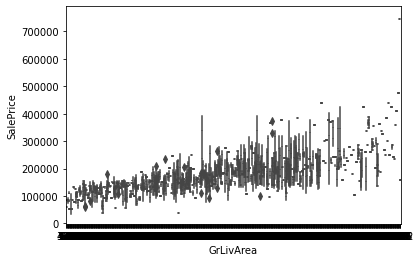

In [78]:
sns.boxplot(x = "GrLivArea",y = "SalePrice", data = houses_data)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


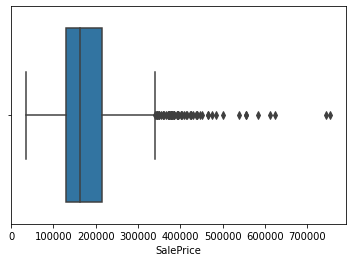

In [12]:
sns.boxplot(houses_data["SalePrice"])

In [13]:
up_lst  = []
low_lst = []
for i in cols:
  print(i)
  Q1 = np.percentile(houses_data[i], 25,interpolation = 'midpoint')
  Q3 = np.percentile(houses_data[i], 75,interpolation = 'midpoint')
  IQR = Q3 - Q1
  # Upper bound
  upper = np.where(houses_data[i] >= (Q3+1.5*IQR))
  print("upper",upper)
  # Lower bound
  lower = np.where(houses_data[i] <= (Q1-1.5*IQR))
  print("lower = ",lower)
  ''' Removing the Outliers '''
  for j in range(len(upper[0])):
    if not (upper[0][j] in up_lst):
      up_lst.append(upper[0][j])
  for k in range(len( lower[0])):
    if not (lower[0][k] in low_lst):
      low_lst.append(lower[0][k])


SalePrice
upper (array([  11,   53,   58,  112,  151,  161,  178,  185,  224,  231,  278,
        309,  313,  320,  321,  336,  349,  378,  389,  440,  473,  477,
        481,  496,  515,  527,  585,  591,  608,  642,  644,  654,  661,
        664,  678,  688,  691,  702,  718,  769,  774,  798,  803,  825,
        877,  898,  987,  990, 1046, 1142, 1169, 1181, 1182, 1228, 1243,
       1267, 1268, 1353, 1373, 1387, 1436]),)
lower =  (array([], dtype=int64),)
OverallQual
upper (array([  58,  185,  224,  389,  440,  515,  523,  583,  591,  691,  825,
        994, 1169, 1182, 1243, 1298, 1373, 1441]),)
lower =  (array([ 375,  533,  636,  916, 1100]),)
GrLivArea
upper (array([  58,  118,  185,  197,  231,  304,  324,  496,  523,  583,  608,
        635,  691,  769,  798,  803,  961, 1024, 1031, 1046, 1142, 1169,
       1173, 1175, 1182, 1268, 1298, 1312, 1328, 1353, 1385]),)
lower =  (array([], dtype=int64),)
GarageCars
upper (array([ 420,  747, 1190, 1340, 1350]),)
lower =  (array([], dty

In [14]:
up_arr = np.array(up_lst)
low_arr = np.array(low_lst)
print("up arr {}".format(up_arr.shape))
print("low arr {}".format(low_arr.shape))
out_lier_rows = np.append(low_arr,up_arr)
print("out_lier_rows {}".format(out_lier_rows.shape))
out_lier_rows = np.unique(out_lier_rows)

up arr (144,)
low arr (50,)
out_lier_rows (194,)


In [15]:
out_lier_rows.shape

(189,)

In [16]:
out_lier_rows = list(out_lier_rows)

In [19]:
#training_data = houses_data
#training_data.head()

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt
0,208500,7,1710,2,548,856,856,2,8,2003
1,181500,6,1262,2,460,1262,1262,2,6,1976
2,223500,7,1786,2,608,920,920,2,6,2001
3,140000,7,1717,3,642,756,961,1,7,1915
4,250000,8,2198,3,836,1145,1145,2,9,2000


In [17]:
training_data = houses_data.drop(out_lier_rows,axis = 0)
training_data.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [19]:
training_data.shape

(1270, 62)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


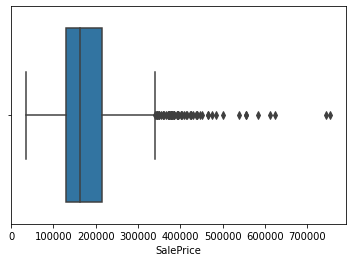

In [20]:
sns.boxplot(houses_data["SalePrice"])

# Data Normalization

In [21]:
training_data.describe()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,...,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000
mean,56.775591,9927.265354,6.007874,5.612598,1971.544094,1984.624409,425.122047,48.247244,560.055906,1033.425197,...,89.942520,43.862205,21.403150,3.429134,14.783465,1.544882,36.089764,6.287402,2007.815748,169808.733071
std,42.756398,8324.149451,1.205426,1.081909,28.949360,20.489245,397.853128,164.688852,418.776240,327.547659,...,119.276056,61.346417,57.979233,29.657211,53.450901,31.924025,462.591100,2.707154,1.329452,57218.726553
min,20.000000,1300.000000,3.000000,2.000000,1890.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,7388.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,238.250000,798.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,130000.000000
50%,50.000000,9218.000000,6.000000,5.000000,1972.000000,1993.000000,389.000000,0.000000,479.500000,977.000000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,159500.000000
75%,70.000000,11205.250000,7.000000,6.000000,2000.000000,2003.000000,689.000000,0.000000,793.000000,1241.750000,...,168.000000,64.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,200410.250000
max,190.000000,164660.000000,10.000000,9.000000,2009.000000,2010.000000,1619.000000,1474.000000,1907.000000,2000.000000,...,736.000000,523.000000,330.000000,508.000000,396.000000,738.000000,15500.000000,12.000000,2010.000000,394617.000000


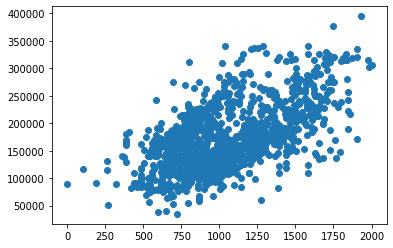

In [22]:
# without outlier
plt.scatter( training_data["TotalBsmtSF"], training_data["SalePrice"])

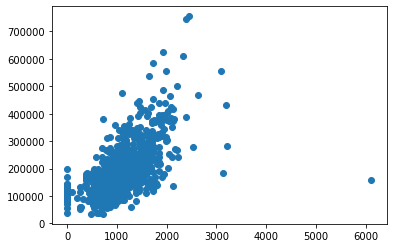

In [23]:
# with outlier
plt.scatter( houses_data["TotalBsmtSF"], houses_data["SalePrice"])

In [25]:
training_data = pd.get_dummies(training_data)
print(training_data.shape)
training_data.head()

(1270, 214)


,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,7,5,2003,2003,706,0,150,856,...,0,0,0,1,0,0,0,0,1,0
1,20,9600,6,8,1976,1976,978,0,284,1262,...,0,0,0,1,0,0,0,0,1,0
2,60,11250,7,5,2001,2002,486,0,434,920,...,0,0,0,1,0,0,0,0,1,0
3,70,9550,7,5,1915,1970,216,0,540,756,...,0,0,0,1,1,0,0,0,0,0
4,60,14260,8,5,2000,2000,655,0,490,1145,...,0,0,0,1,0,0,0,0,1,0


In [26]:
std_scaler = StandardScaler()
 
df_scaled = std_scaler.fit_transform(training_data.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=training_data.columns)
 
print("Scaled Dataset Using StandardScaler")
df_scaled.head()

Scaled Dataset Using StandardScaler


,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.075443,-0.177537,0.823375,-0.566443,1.087012,0.897194,0.706262,-0.293075,-0.979562,-0.541891,...,-0.05621,-0.266132,-0.04866,0.35621,-0.276172,-0.04866,-0.068897,-0.123239,0.438735,-0.271186
1,-0.860458,-0.039331,-0.006535,2.207526,0.153981,-0.421090,1.390201,-0.293075,-0.659456,0.698112,...,-0.05621,-0.266132,-0.04866,0.35621,-0.276172,-0.04866,-0.068897,-0.123239,0.438735,-0.271186
2,0.075443,0.158966,0.823375,-0.566443,1.017898,0.848369,0.153076,-0.293075,-0.301129,-0.346422,...,-0.05621,-0.266132,-0.04866,0.35621,-0.276172,-0.04866,-0.068897,-0.123239,0.438735,-0.271186
3,0.309418,-0.045340,0.823375,-0.566443,-1.953977,-0.714041,-0.525833,-0.293075,-0.047911,-0.847310,...,-0.05621,-0.266132,-0.04866,0.35621,3.620927,-0.04866,-0.068897,-0.123239,-2.279281,-0.271186
4,0.075443,0.520707,1.653284,-0.566443,0.983342,0.750718,0.578024,-0.293075,-0.167353,0.340771,...,-0.05621,-0.266132,-0.04866,0.35621,-0.276172,-0.04866,-0.068897,-0.123239,0.438735,-0.271186


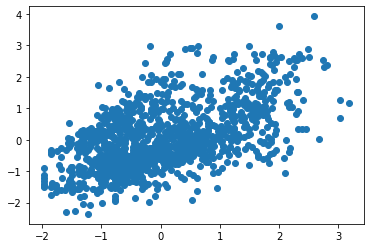

In [27]:
plt.scatter( df_scaled["1stFlrSF"], df_scaled["SalePrice"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


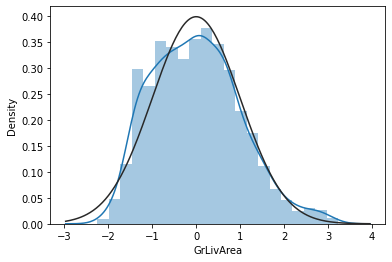

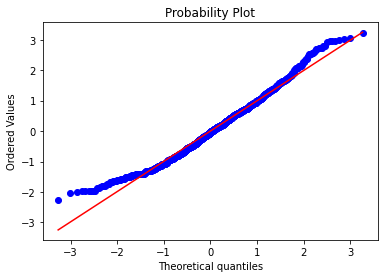

In [28]:
from  scipy.stats import norm
from scipy import stats
#histogram and normal probability plot
sns.distplot(df_scaled['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_scaled['GrLivArea'], plot=plt)

## Model for Regression

In [29]:
X = df_scaled.drop(["SalePrice"],axis=1)
y = df_scaled["SalePrice"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25)
print(f"Train shape is {X_train.shape} Test_shape {X_test.shape}")
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)
y_lr_pred = lr_model.predict(X_test)

Train shape is (952, 213) Test_shape (318, 213)


In [30]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

MSE =  mean_squared_error(y_test , y_lr_pred)
print("MSE of LinearRegression = ",MSE)
MAE = mean_absolute_error(y_test , y_lr_pred)
print("MAE of LinearRegression = " , MAE)
r2 = r2_score(y_test , y_lr_pred )
print("r2_score of LinearRegression = " , r2)

MSE of LinearRegression =  4.916427889515001e+25
MAE of LinearRegression =  555111429154.9226
r2_score of LinearRegression =  -4.901695253847109e+25


In [31]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

MSE =  mean_squared_error(y_test , y_lr_pred)
print("MSE of LinearRegression = ",MSE)
MAE = mean_absolute_error(y_test , y_lr_pred)
print("MAE of LinearRegression = " , MAE)
r2 = r2_score(y_test , y_lr_pred )
print("r2_score of LinearRegression = " , r2)

MSE of LinearRegression =  4.916427889515001e+25
MAE of LinearRegression =  555111429154.9226
r2_score of LinearRegression =  -4.901695253847109e+25


In [32]:
from sklearn.linear_model import Ridge,  Lasso
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train,y_train)
lasso_y_pred = lasso_model.predict(X_test)

MSE =  mean_squared_error(y_test , lasso_y_pred)
print("MSE of lassoRegression = ",MSE)
MAE = mean_absolute_error(y_test , lasso_y_pred)
print("MAE of lassoRegression = " , MAE)
r2 = r2_score(y_test , lasso_y_pred )
print("r2_score of lassoRegression = " , r2)

MSE of lassoRegression =  0.09672778147098203
MAE of lassoRegression =  0.22314703624562063
r2_score of lassoRegression =  0.9035620743339642


In [33]:
ridge_model = Ridge(alpha=0.01)
ridge_model.fit(X_train,y_train)
ridge_y_pred = ridge_model.predict(X_test)

MSE =  mean_squared_error(y_test , ridge_y_pred)
print("MSE of RidgeRegression = ",MSE)
MAE = mean_absolute_error(y_test , ridge_y_pred)
print("MAE of RidgeRegression = " , MAE)
r2 = r2_score(y_test , ridge_y_pred )
print("r2_score of lassoRegression = " , r2)

MSE of RidgeRegression =  0.1056474087801975
MAE of RidgeRegression =  0.235515150862996
r2_score of lassoRegression =  0.8946691757030479


In [34]:
import xgboost as xg
 

# Instantiation
xgb_r = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 100, seed = 123)
 
# Fitting the model
xgb_r.fit(X_train, y_train)
 
# Predict the model
xgb_y_pred = xgb_r.predict(X_test)
 
MSE =  mean_squared_error(y_test , xgb_y_pred)
print("MSE of XGBRegressor = ",MSE)
MAE = mean_absolute_error(y_test , xgb_y_pred)
print("MAE of XGBRegressor = " , MAE)
r2 = r2_score(y_test , xgb_y_pred )
print("r2_score of XGBRegressor = " , r2)

[16:34:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MSE of XGBRegressor =  0.10608848212672925
MAE of XGBRegressor =  0.2313101459580315
r2_score of XGBRegressor =  0.8942294240829939
